# DATA IMPORT AND INITIAL EXPLORATION

In [45]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd

In [46]:
# READ THE DATA FROM 'Churn_Modelling.csv'
df = pd.read_csv('Churn_Modelling.csv')

# DISPLAY THE FIRST 10 ROWS OF THE DATASET
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [47]:
# DISPLAY THE SHAPE OF THE DATASET
print(df.shape)

(10000, 14)


# DATA PREPROCESSING


In [48]:
# DROP UNNECESSARY COLUMNS
df.drop(columns=['RowNumber' , 'CustomerId' , 'Surname'] , inplace =True)

In [49]:
# DISPLAY THE FIRST FEW ROWS AFTER DROPPING COLUMNS
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# DATA CLEANING

In [50]:
# CHECK FOR DUPLICATE ROWS IN THE DATASET
print("DUPLICATES:", df.duplicated().sum())

DUPLICATES: 0


In [51]:
# DISPLAY DATA TYPES OF THE COLUMNS
print(df.dtypes)

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [52]:
# CHECK FOR MISSING VALUES IN THE DATASET
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


# DATA TRANSFORMATION

In [53]:
# ENCODE 'GENDER' COLUMN (FEMALE -> 1, MALE -> 0)
df['Gender'].replace({'Female':1 , 'Male':0} , inplace =True)

In [54]:
# DISPLAY THE FIRST FEW ROWS AFTER ENCODING
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [55]:
# ONE-HOT ENCODE 'GEOGRAPHY' COLUMN
print("UNIQUE VALUES IN 'GEOGRAPHY':", df['Geography'].unique())
df = pd.get_dummies(df, columns=['Geography'] , dtype='int')

UNIQUE VALUES IN 'GEOGRAPHY': ['France' 'Spain' 'Germany']


In [56]:
# DISPLAY THE FIRST FEW ROWS AFTER ONE-HOT ENCODING
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# EXPLORATORY DATA ANALYSIS

In [57]:
# DISPLAY THE DISTRIBUTION OF THE TARGET VARIABLE 'EXITED'
print(df['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


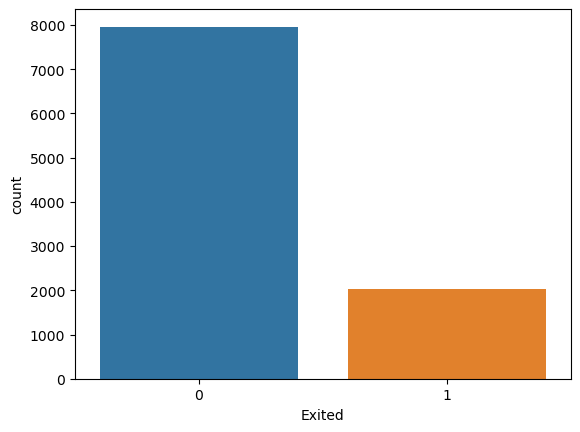

In [58]:
# PLOT THE DISTRIBUTION OF 'EXITED'
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Exited')
plt.show()

# FEATURE AND LABEL SEPARATION

In [59]:
# SEPARATE FEATURES AND LABELS
X = df.drop('Exited' , axis=1)
Y = df['Exited']

# SPLIT THE DATA INTO TRAINING AND TEST SETS

In [60]:
# IMPORTING train_test_split FROM sklearn TO SPLIT THE DATA
from  sklearn.model_selection import train_test_split

# SPLIT THE DATA INTO TRAINING AND TEST SETS
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2 , random_state=42)

In [61]:
# CALCULATE SCALE POSITIVE WEIGHT FOR IMBALANCED CLASSES
scale_pos_weight = Y_train.value_counts()[0] / Y_train.value_counts()[1]
print("SCALE POSITIVE WEIGHT:", scale_pos_weight)

SCALE POSITIVE WEIGHT: 3.8661800486618003


# MODEL TRAINING (XGBoost)

In [62]:
# IMPORT XGBOOST CLASSIFIER AND TRAIN THE MODEL
from xgboost import XGBClassifier

# TRAIN THE XGBoost CLASSIFIER
model = XGBClassifier(random_state=42)
model.fit(X_train , Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# MODEL PREDICTIONS

In [63]:
# MAKE PREDICTIONS ON THE TEST SET
Y_pred = model.predict(X_test)

# MODEL EVALUATION

In [64]:
# IMPORT METRICS FOR EVALUATION
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# PRINT CONFUSION MATRIX
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

# PRINT CLASSIFICATION REPORT
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

# PRINT ACCURACY SCORE
print("\nAccuracy Score:\n", accuracy_score(Y_test, Y_pred))


Confusion Matrix:
 [[1523   84]
 [ 191  202]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000


Accuracy Score:
 0.8625
